Seaborn = Statistical Data Visualization  
통계를 기반으로한 데이터 시각화  
  
PDF = 확률 밀도 함수  
PDF를 많이 사용하게 됨.  
PDF는 데이터셋의 분포를 나타낸다  
특정 구간의 확률은 그래프 아래 그 구간의 면적과 동일하다  
그래프 아래의 총 넓이는 1이다  
  
KDE 라고 굴곡이 너무 심한 그래프를 매끄럽게 최대한 오차가  
생기지 않게 해주는게 있다.

In [1]:
#!pip install seaborn==0.9.0
import pandas as pd
import seaborn as sns
body_df=pd.read_csv('data/body.csv')
body_df.head(10)

,Number,Height,Weight
0,1,176.0,85.2
1,2,175.3,67.7
2,3,168.6,75.2
3,4,168.1,67.1
4,5,175.3,63.0
5,6,175.4,72.7
6,7,181.5,87.9
7,8,174.2,64.5
8,9,176.4,57.5
9,10,175.8,66.4


In [2]:
body_df['Height']

0      176.0
1      175.3
2      168.6
3      168.1
4      175.3
       ...  
995    171.8
996    171.5
997    177.9
998    174.4
999    173.5
Name: Height, Length: 1000, dtype: float64

In [3]:
# 정렬하고
body_df['Height'].value_counts().sort_index()

154.4    1
155.5    1
157.4    1
157.8    1
158.0    1
        ..
190.3    1
191.2    1
191.8    1
192.4    1
193.1    1
Name: Height, Length: 262, dtype: int64

<AxesSubplot:>

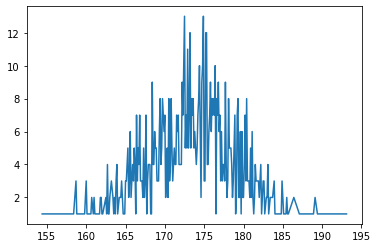

In [4]:
# 그래프 그리기
# 그런데 그래프를 보면 알 수 있듯이 매끄럽지 못하고
# 가독성이 떨어진다.

# 그리고 지금 body_df['Height'] 만 뽑은 상태여서
# series 상태이다 따라서 정렬할때 sort_index() 라고
# 해야함.
# 원래 2차원일때는 sort_values() 임
body_df['Height'].value_counts().sort_index().plot()

<AxesSubplot:>

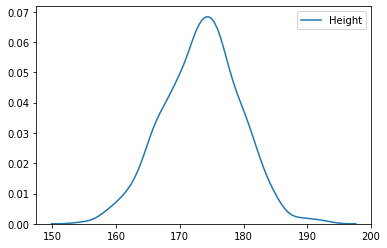

In [5]:
# 따라서 seaborn으로 보기 쉽게 매끄럽게 바꿔준다.
# kdeplot
sns.kdeplot(body_df['Height'])

<AxesSubplot:>

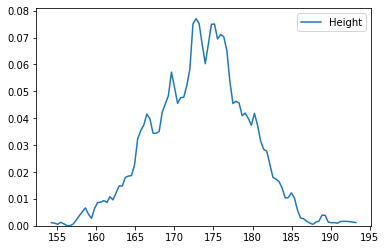

In [6]:
# 그런데 이걸 매끄럽게 만들다 보니 우리가 
# 어느정도 추측한 그래프가 나온다. 오차가 생길 수
# 밖에 없다. 따라서 그래프의 오차를 정해 줄 수있다.
# bw 파라미터를 주면 오차를 정할 수있는데
# bw가 몇개의 구간으로 나누는지 같은 역할을 한다.
# 작을 수록 오차가 적음!!(더 굴곡져진다.)
sns.kdeplot(body_df['Height'], bw=0.05)

<AxesSubplot:ylabel='Frequency'>

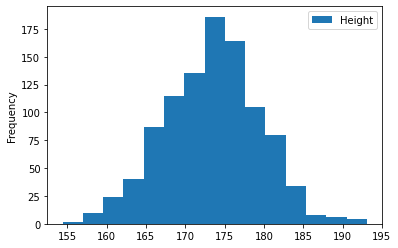

In [7]:
body_df.plot(kind='hist',y='Height',bins=15)

<AxesSubplot:xlabel='Height'>

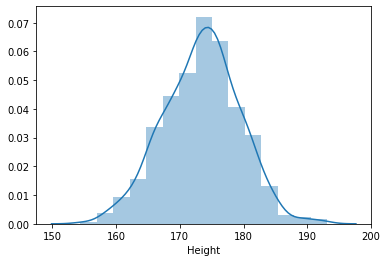

In [8]:
# 히스토그램에 seaborn을 적용하면 히스토그램 위에
# 그래프를 그릴 수 있다.
# plot은 distplot
sns.distplot(body_df['Height'],bins=15)

<AxesSubplot:>

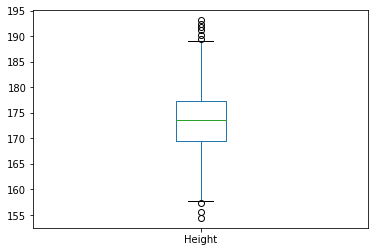

In [9]:
# 박스플롯
body_df.plot(kind='box',y='Height')

<AxesSubplot:ylabel='Height'>

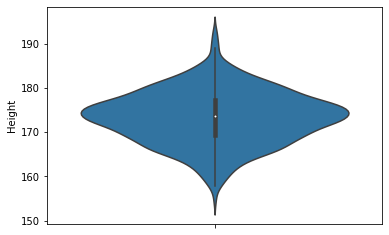

In [10]:
# 박스플롯 seaborn
# 분포 전체를 보여주는 느낌
# violinplot
sns.violinplot(y=body_df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

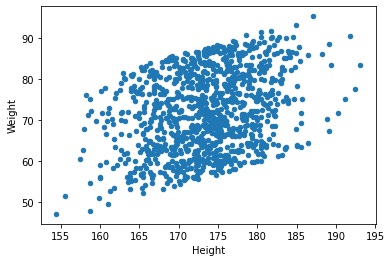

In [11]:
body_df.plot(kind='scatter',x='Height',y='Weight')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

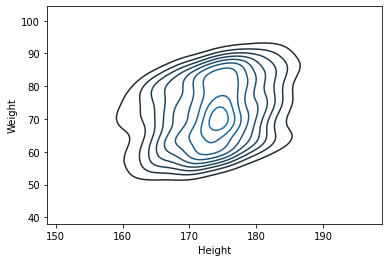

In [12]:
# 이렇게 파라미터를 2개 넘겨주면
# sns.kdeplot(x축,y축) 이다.
# 이렇게하면 등고선 모양이 나온다.
# 그니까 이게 밑에 그래프 보면 알겠지만
# x축에는 body_df['Height'] 그래프를
# y축에는 body_df['Weight'] 그래프를 
# 그려서 그걸 3D로 만들고 위에서 본 모습이다.

# 선이 가까울수록 가파르고, 선이 멀수록 평평하다.
# 그니까 x축그래프sns.kdeplot(body_df['Height'])
# 가 가파르다가 밑에서 평평해지는게 위에서 보면 보임
sns.kdeplot(body_df['Height'],body_df['Weight'])

<AxesSubplot:>

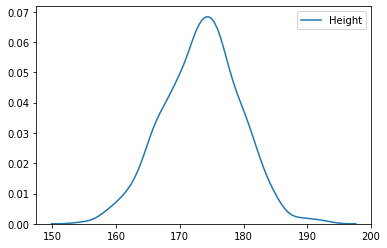

In [13]:
sns.kdeplot(body_df['Height'])

<AxesSubplot:>

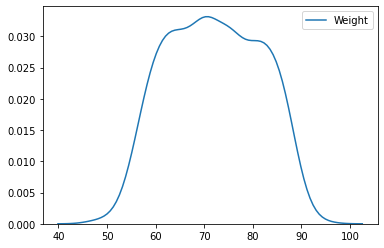

In [14]:
sns.kdeplot(body_df['Weight'])

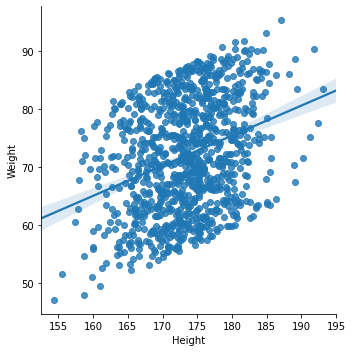

In [15]:
# 연관이 있는 키와 몸무게를 키가 주어졌을때 몸무게를 예측 할 수있다.
# lmplot을 통해서
# lmplot에는 회귀선이라는게 존재한다.
# 회귀선은 흩어져있는 점들을 하나의 선으로 표현한것
# 이 회귀선이 산점도 이 그래프를 선으로 모은것이다.
# 산점도가 둘 사이의 관계를 더 연관있게 그려져 있을 수록
# 회귀선의 정확도는 올라간다.
sns.lmplot(data=body_df,x='Height',y='Weight')

In [17]:
laptops_df=pd.read_csv('data/laptops.csv')
laptops_df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [19]:
laptops_df['os'].unique()

array(['linux', 'mac', 'windows'], dtype=object)

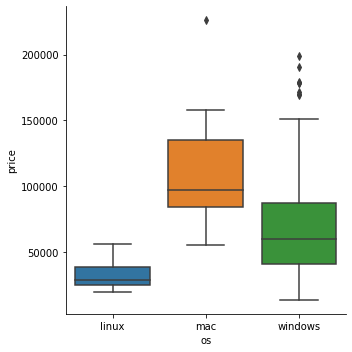

In [20]:
# 각각의 카테고리별로 비교하고 싶을때
# catplot 사용
# 어떤 플롯으로 비교하고 싶은지도 정해야한다.
sns.catplot(data=laptops_df,x='os',y='price',kind='box')

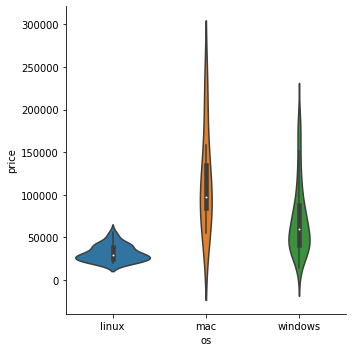

In [21]:
sns.catplot(data=laptops_df,x='os',y='price',kind='violin')

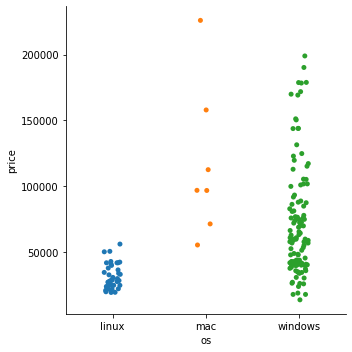

In [22]:
# 그런데 각 카테고리에 데이터가 몇개씩 있는지 모르기 때문에
# 각 카테고리마다 신뢰도가 얼마나 되는지 알 수 없다.
# 이럴때 kind를 strip으로 하면
# 데이터를 하나하나 볼 수있다.
sns.catplot(data=laptops_df,x='os',y='price',kind='strip')

In [23]:
laptops_df['processor_brand'].unique()

array(['intel', 'amd'], dtype=object)

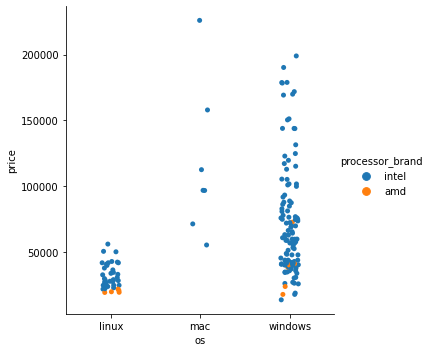

In [26]:
# 데이터들 중에서 어떤 프로세서를 쓰는지 까지 보고 싶으면
# hue 라는 파라미터를 준다.
# 여기서 hue는 색을 의미한다. 즉, 프로세서에 따라 다른 색깔로
# 보여지게 된다.
sns.catplot(data=laptops_df,x='os',y='price',kind='strip',hue='processor_brand')

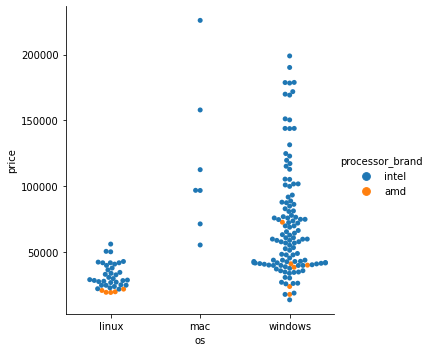

In [27]:
# strip플롯에서 점들이 많이 모여져 있는 부분에서는 구분하기
# 어려우므로 swarm 플롯을 사용하면 모여있는 점들이 펼쳐져서
# 눈으로 보기에 더 좋아진다.
sns.catplot(data=laptops_df,x='os',y='price',kind='swarm',hue='processor_brand')

In [1]:
# 숫자 데이터 사이의 상관 계수를 보여주는 
# corr()
df=pd.read_csv('data/exam.csv')
df.corr()
# 색이 밝을 수록 상관 계수가 더 높다.
sns.heatmap(df.corr())

NameError: name 'pd' is not defined

In [ ]:
# 색상뿐 아니라 숫자도 함께 보여줌
sns.heatmap(df.corr(),annot=True)